# Mays Business School Project

In [2]:
# Importing the libraries 
import pandas as pd
import numpy as np 
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans 
from scipy.cluster import hierarchy

In [3]:
# Importing the dataset
df = pd.read_excel (r'/Users/sushantkumar/Documents/MAYS BUSINESS SCHOOL PROJECT/Cleaned Data/Cleaned_MAYS-Campus Google Ads Overview Report _Copy of Keywords_Table.xlsm') #place "r" before the path string to address special character, such as '\'. Don't forget to put the file name at the end of the path + '.xlsx'

In [4]:
# Converting the data into dataframe 
data=pd.DataFrame(df)
data.head()

,All_networks_keywords,Keywords,Unique_id,Date,Day_of_week,Generic,Full_time_MBA,Exec_MBA,MBA_Ranking,TAMU_MBA,...,TAMU_ Online_MBA,Competitors,PMBA,Unused_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend (ROAS),Conversion_rate_%
0,mba education,MBA EDUCATION,3,2021-09-20,1,1,0,0,0,0,...,0,0,0,0,60,191.34,3.19,0.0368,0.55,0.1100
1,mba education,MBA EDUCATION,3,2021-09-12,0,1,0,0,0,0,...,0,0,0,0,57,220.83,3.87,0.0332,0.07,0.0526
2,mba education,MBA EDUCATION,3,2021-09-15,3,1,0,0,0,0,...,0,0,0,0,55,237.96,4.33,0.0336,0.08,0.0455
3,mba education,MBA EDUCATION,3,2021-09-19,0,1,0,0,0,0,...,0,0,0,0,52,173.83,3.34,0.0355,1.09,0.1538
4,mba education,MBA EDUCATION,3,2021-09-21,2,1,0,0,0,0,...,0,0,0,0,50,142.66,2.85,0.0373,0.74,0.1600


In [6]:
# Checking the column and feature names 
type(data)

pandas.core.frame.DataFrame

In [7]:
data.shape # Gives the number of rows and columns in the dataset 

(39016, 21)

In [8]:
data.columns  # Gives all the features/column names in the dataset

Index(['All_networks_keywords', 'Keywords', 'Unique_id', 'Date', 'Day_of_week',
       'Generic', 'Full_time_MBA', 'Exec_MBA ', 'MBA_Ranking ', 'TAMU_MBA ',
       'TAMU_Exec_MBA ', 'TAMU_ Online_MBA ', 'Competitors', 'PMBA ',
       'Unused_Keywords', 'Clicks', 'Cost', 'CPC', 'CTR',
       'Return_on_ad_spend (ROAS)', 'Conversion_rate_%'],
      dtype='object')

In [9]:
# Checking the missing values 
data.isnull().sum()

All_networks_keywords            0
Keywords                         0
Unique_id                        0
Date                             0
Day_of_week                      0
Generic                          0
Full_time_MBA                    0
Exec_MBA                         0
MBA_Ranking                      0
TAMU_MBA                         0
TAMU_Exec_MBA                    0
TAMU_ Online_MBA                 0
Competitors                      0
PMBA                             0
Unused_Keywords                  0
Clicks                           0
Cost                             0
CPC                          26890
CTR                              0
Return_on_ad_spend (ROAS)    26890
Conversion_rate_%            26890
dtype: int64

In [10]:
# Replacing the NA values with 0 
data1=data.fillna(0)
data1[39000:39016]

,All_networks_keywords,Keywords,Unique_id,Date,Day_of_week,Generic,Full_time_MBA,Exec_MBA,MBA_Ranking,TAMU_MBA,...,TAMU_ Online_MBA,Competitors,PMBA,Unused_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend (ROAS),Conversion_rate_%
39000,top executive mba,TOP EXECUTIVE MBA,166,2022-05-31,2,0,0,1,1,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
39001,top full time mba,TOP FULL TIME MBA,366,2022-05-31,2,0,1,0,0,0,...,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
39002,top mba degree,TOP MBA DEGREE,134,2022-05-31,2,1,0,0,1,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
39003,top mba in houston,TOP MBA IN HOUSTON,367,2022-05-31,2,1,0,0,1,0,...,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0
39004,top mba program,TOP MBA PROGRAM,151,2022-05-31,2,1,0,0,1,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
39005,top mba school,TOP MBA SCHOOL,68,2022-05-31,2,1,0,0,1,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
39006,top mba university,TOP MBA UNIVERSITY,167,2022-05-31,2,1,0,0,1,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
39007,top professional mba,TOP PROFESSIONAL MBA,226,2022-05-31,2,0,0,0,1,0,...,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
39008,what is an emba,WHAT IS AN EMBA,177,2022-05-31,2,0,0,1,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
39009,what is an emba degree,WHAT IS AN EMBA DEGREE,144,2022-05-31,2,0,0,1,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Checking the missing values again 
data1.isnull().sum()

All_networks_keywords        0
Keywords                     0
Unique_id                    0
Date                         0
Day_of_week                  0
Generic                      0
Full_time_MBA                0
Exec_MBA                     0
MBA_Ranking                  0
TAMU_MBA                     0
TAMU_Exec_MBA                0
TAMU_ Online_MBA             0
Competitors                  0
PMBA                         0
Unused_Keywords              0
Clicks                       0
Cost                         0
CPC                          0
CTR                          0
Return_on_ad_spend (ROAS)    0
Conversion_rate_%            0
dtype: int64

In [12]:
# All the NA values have been removed 

In [13]:
# Taking the data with only the non zero values of CPC, CTC, conversion rate 
data2=data[0:12126]
# Droping the column unused keywords from the dataset
data_cleaned=data2.drop(['All_networks_keywords','Unused_Keywords'], axis = 1)
data_cleaned.isnull().sum()

Keywords                     0
Unique_id                    0
Date                         0
Day_of_week                  0
Generic                      0
Full_time_MBA                0
Exec_MBA                     0
MBA_Ranking                  0
TAMU_MBA                     0
TAMU_Exec_MBA                0
TAMU_ Online_MBA             0
Competitors                  0
PMBA                         0
Clicks                       0
Cost                         0
CPC                          0
CTR                          0
Return_on_ad_spend (ROAS)    0
Conversion_rate_%            0
dtype: int64

In [14]:
# Checking the descriptive statistics of the dataset
data_cleaned.describe()
data_cleaned.shape # The cleaned data has 12126 rows and 18 columns 

(12126, 19)

In [15]:
# Extracting the date, month and year from the date series 
data_cleaned['year'] = pd.DatetimeIndex(data_cleaned['Date']).year
data_cleaned['month'] = pd.DatetimeIndex(data_cleaned['Date']).month
# extracting the week number
data_cleaned['week_number'] = data_cleaned['Date'].dt.isocalendar().week

In [16]:
data_cleaned.head()

,Keywords,Unique_id,Date,Day_of_week,Generic,Full_time_MBA,Exec_MBA,MBA_Ranking,TAMU_MBA,TAMU_Exec_MBA,...,PMBA,Clicks,Cost,CPC,CTR,Return_on_ad_spend (ROAS),Conversion_rate_%,year,month,week_number
0,MBA EDUCATION,3,2021-09-20,1,1,0,0,0,0,0,...,0,60,191.34,3.19,0.0368,0.55,0.1100,2021,9,38
1,MBA EDUCATION,3,2021-09-12,0,1,0,0,0,0,0,...,0,57,220.83,3.87,0.0332,0.07,0.0526,2021,9,36
2,MBA EDUCATION,3,2021-09-15,3,1,0,0,0,0,0,...,0,55,237.96,4.33,0.0336,0.08,0.0455,2021,9,37
3,MBA EDUCATION,3,2021-09-19,0,1,0,0,0,0,0,...,0,52,173.83,3.34,0.0355,1.09,0.1538,2021,9,37
4,MBA EDUCATION,3,2021-09-21,2,1,0,0,0,0,0,...,0,50,142.66,2.85,0.0373,0.74,0.1600,2021,9,38


In [17]:
data_cleaned.shape

(12126, 22)

In [18]:
# Finding the 1st correlation between the features
#corr=data_cleaned.corr()
#corr

In [19]:
# Plotting the 1st heatmap od correlation between the features 
#plt.figure(figsize=(12,12))
#sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens'); 

In [20]:
df1=data_cleaned 

In [21]:
df1.shape # It has all the 22 variables and only the data for which there is a click.

(12126, 22)

In [22]:
df1.columns

Index(['Keywords', 'Unique_id', 'Date', 'Day_of_week', 'Generic',
       'Full_time_MBA', 'Exec_MBA ', 'MBA_Ranking ', 'TAMU_MBA ',
       'TAMU_Exec_MBA ', 'TAMU_ Online_MBA ', 'Competitors', 'PMBA ', 'Clicks',
       'Cost', 'CPC', 'CTR', 'Return_on_ad_spend (ROAS)', 'Conversion_rate_%',
       'year', 'month', 'week_number'],
      dtype='object')

In [23]:
# Performing linear regression 
# Defining independent and dependent variables 
#X=df1.drop(['Date', axis=1) 
#X=df1.drop(columns = df1.columns[0:2], axis = 1) # Dropping the 1st column i.e All_Network_Words_Cleaned
X=df1.drop(['Keywords','Date'], axis = 1)
df2=X.drop(['CTR'], axis = 1)
Y=df1['CTR'] # The dependent variable 

In [24]:
X.columns

Index(['Unique_id', 'Day_of_week', 'Generic', 'Full_time_MBA', 'Exec_MBA ',
       'MBA_Ranking ', 'TAMU_MBA ', 'TAMU_Exec_MBA ', 'TAMU_ Online_MBA ',
       'Competitors', 'PMBA ', 'Clicks', 'Cost', 'CPC', 'CTR',
       'Return_on_ad_spend (ROAS)', 'Conversion_rate_%', 'year', 'month',
       'week_number'],
      dtype='object')

In [25]:
df2.columns

Index(['Unique_id', 'Day_of_week', 'Generic', 'Full_time_MBA', 'Exec_MBA ',
       'MBA_Ranking ', 'TAMU_MBA ', 'TAMU_Exec_MBA ', 'TAMU_ Online_MBA ',
       'Competitors', 'PMBA ', 'Clicks', 'Cost', 'CPC',
       'Return_on_ad_spend (ROAS)', 'Conversion_rate_%', 'year', 'month',
       'week_number'],
      dtype='object')

In [26]:
df2.shape

(12126, 19)

In [27]:
X.shape

(12126, 20)

In [28]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test= train_test_split(df2,Y, test_size=0.3, random_state=4)
#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)

In [29]:
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
#lm=LinearRegression()

In [30]:
# Training the model using training set
#lm.fit(X_train, Y_train)

In [31]:
# model evaluation for training set
#y_train_predict = lm.predict(X_train)
#rmse = (np.sqrt(metrics.mean_squared_error(Y_train, y_train_predict)))
#R2 = metrics.r2_score(Y_train, y_train_predict)
#Adjusted_R2=1-(1-metrics.r2_score(Y_train,y_train_predict ))*(len(Y_train-1)/len(Y_train-X_train.shape[1]-1)) 
#mse=metrics.mean_squared_error(Y_train,y_train_predict)
#print('RMSE:', format(rmse,".3f"))
#print('R2:', format(R2,".3f"))
#print('Adjusted_R2:', format(Adjusted_R2,".3f"))
#print('MSE:', format(mse,".3f"))

In [32]:
# Visualizing the difference between actual and predicted values 
#plt.scatter(Y_train, y_train_predict, color='red')
#plt.plot([0, 4], [0, 3], 'b-')
#plt.xlabel("CTR")
#plt.ylabel("Predicted_CTR")
#plt.title(" Predicted Vs Actual")
#plt.show()

In [33]:
# Inspecting the residuals; If there is random distribution, it indicates a good fit 
#plt.scatter(y_train_predict, Y_train-y_train_predict)
#plt.title("Predicted Vs Residuals")
#plt.xlabel("Predicted")
#plt.ylabel("Residuals")

In [34]:
# There is a clear pattern between the residuals and predicted values, indicating the linear model is not a great fit

In [35]:
# Checking the normality of the error
#sns.histplot(Y_train-y_train_predict, binrange=(-1,1))
#plt.title("Histogram of Residuals")
#plt.xlabel("Residuals")
#plt.ylabel("Frequency")
#plt.show()

In [36]:
# Model Evaluation on the test dataset

In [37]:
#Predicting % Conversion on the model
#y_test_predict=lm.predict(X_test)

In [38]:
# Model Evaluation
#R2_score=metrics.r2_score(Y_test, y_test_predict)
#RMSE = (np.sqrt(metrics.mean_squared_error(Y_test, y_test_predict)))
#Adjust_R2=1-(1-metrics.r2_score(Y_test,y_test_predict ))*(len(Y_test-1)/len(Y_test-X_test.shape[1]-1)) 
#MSE=metrics.mean_squared_error(Y_test,y_test_predict)
#print('RMSE:', format(RMSE,".3f"))
#print('R2:', format(R2_score,".3f"))
#print('Adjusted_R2:', format(Adjust_R2,".3f"))
#print('MSE:', format(MSE,".3f"))

In [39]:
X.head()

,Unique_id,Day_of_week,Generic,Full_time_MBA,Exec_MBA,MBA_Ranking,TAMU_MBA,TAMU_Exec_MBA,TAMU_ Online_MBA,Competitors,PMBA,Clicks,Cost,CPC,CTR,Return_on_ad_spend (ROAS),Conversion_rate_%,year,month,week_number
0,3,1,1,0,0,0,0,0,0,0,0,60,191.34,3.19,0.0368,0.55,0.1100,2021,9,38
1,3,0,1,0,0,0,0,0,0,0,0,57,220.83,3.87,0.0332,0.07,0.0526,2021,9,36
2,3,3,1,0,0,0,0,0,0,0,0,55,237.96,4.33,0.0336,0.08,0.0455,2021,9,37
3,3,0,1,0,0,0,0,0,0,0,0,52,173.83,3.34,0.0355,1.09,0.1538,2021,9,37
4,3,2,1,0,0,0,0,0,0,0,0,50,142.66,2.85,0.0373,0.74,0.1600,2021,9,38


In [40]:
# 1. Convert the dataframe into an array 
X1=X.values
X1

array([[3, 1, 1, ..., 2021, 9, 38],
       [3, 0, 1, ..., 2021, 9, 36],
       [3, 3, 1, ..., 2021, 9, 37],
       ...,
       [91, 2, 0, ..., 2022, 5, 22],
       [106, 2, 0, ..., 2022, 5, 22],
       [139, 2, 1, ..., 2022, 5, 22]], dtype=object)

# Visualization of the data 

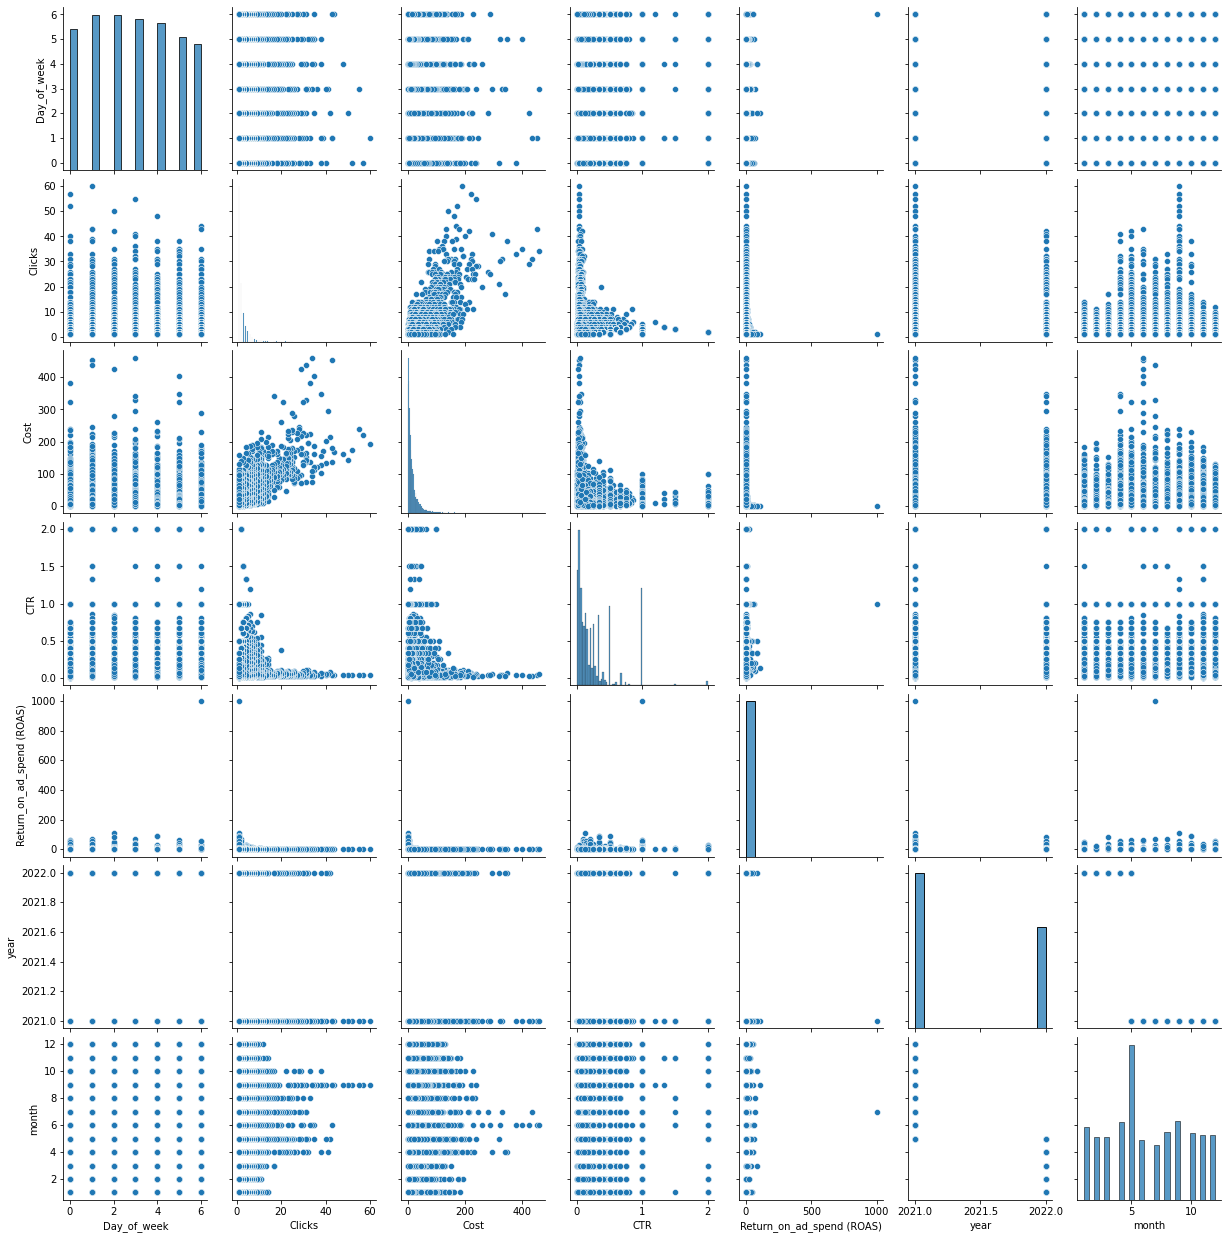

In [41]:
sns.pairplot(df1[['Day_of_week','Clicks', 'Cost','CTR', 'Return_on_ad_spend (ROAS)','year','month']]);

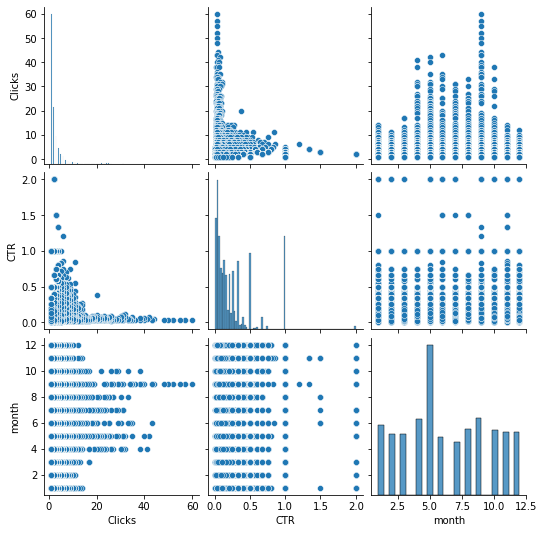

In [42]:
sns.pairplot(X[['Clicks', 'CTR', 'month']]);

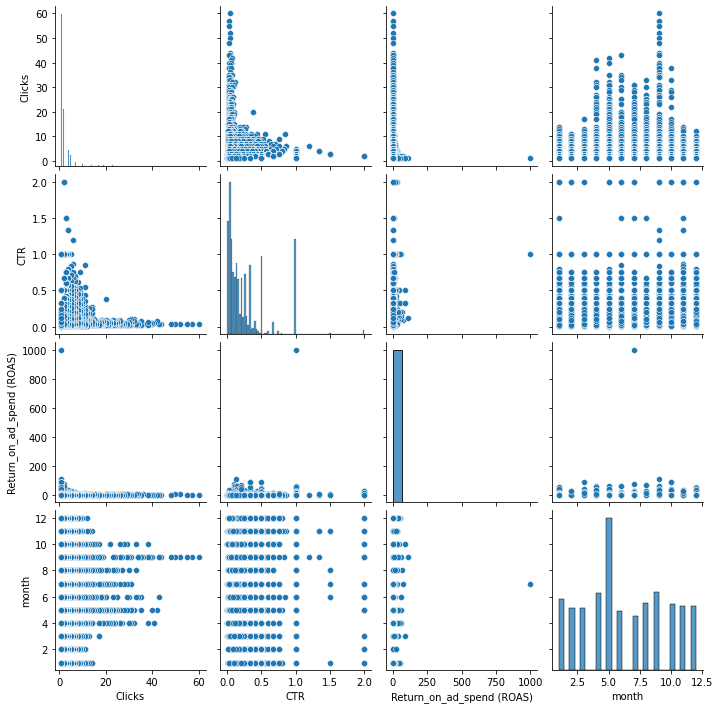

In [43]:
sns.pairplot(X[['Clicks', 'CTR', 'Return_on_ad_spend (ROAS)','month']]);

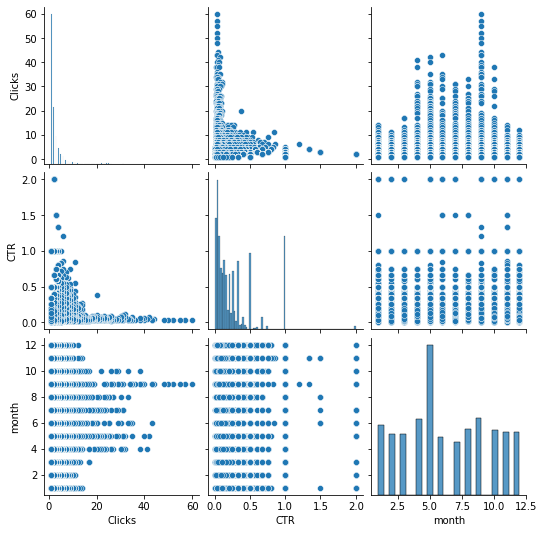

In [44]:
sns.pairplot(X[['Clicks','CTR','month']]);

# Performing KMeans on entire dataset without PCA 

In [45]:
kmeans = KMeans(n_clusters=4, n_init=20, random_state=540)
kmeans.fit(X)
kmeans.labels_ # returns the labels 
print('The Clusters are:', kmeans.labels_)
print("The Inertia is:", kmeans.inertia_) # Inertia is the within cluster sum of squares 

The Clusters are: [2 2 2 ... 3 3 0]
The Inertia is: 12655527.833756212


In [46]:
kmeans.labels_.shape

(12126,)

In [47]:
# Finding the optimal clusters by the inertia values 
no_of_clusters=range(2,20)
inertia= []
for f in no_of_clusters:
    kmeans=KMeans(n_clusters=f, n_init=20, random_state=540)
    kmeans=kmeans.fit(X)
    u=kmeans.inertia_
    inertia.append(u)
    print("The inertia for", f, "Cluster is:", u)

The inertia for 2 Cluster is: 22287411.566334423
The inertia for 3 Cluster is: 15804540.641845353
The inertia for 4 Cluster is: 12655527.83375621
The inertia for 5 Cluster is: 11044305.126410894
The inertia for 6 Cluster is: 9667388.17796187
The inertia for 7 Cluster is: 8580232.788547898
The inertia for 8 Cluster is: 7581951.3527596705
The inertia for 9 Cluster is: 6862480.206586234
The inertia for 10 Cluster is: 6232999.569346599
The inertia for 11 Cluster is: 5767366.195350326
The inertia for 12 Cluster is: 5366084.903459783
The inertia for 13 Cluster is: 4976031.833883908
The inertia for 14 Cluster is: 4623301.433544381
The inertia for 15 Cluster is: 4409812.574595496
The inertia for 16 Cluster is: 4221565.2880049
The inertia for 17 Cluster is: 4040642.4879783075
The inertia for 18 Cluster is: 3868660.806792152
The inertia for 19 Cluster is: 3740759.0659197415


Text(0.5, 1.0, ' Scree Plot of Inertia_Score Vs No_of_clusters')

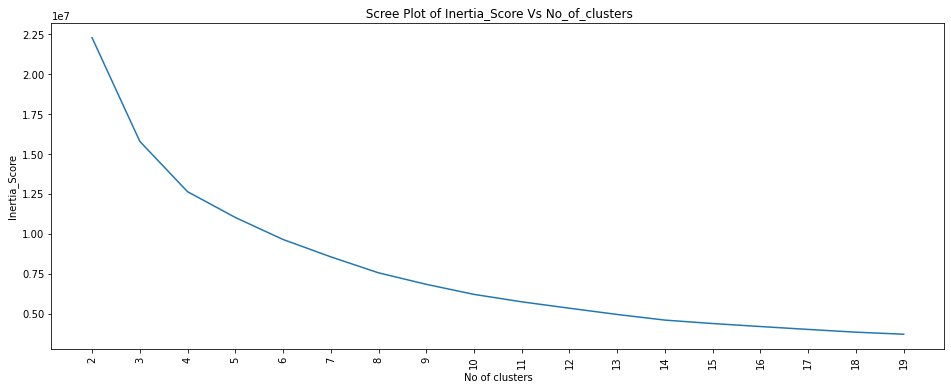

In [48]:
# Plotting the inertia for different cluster numbers 
# Creating the scree plot for inertia- Elbow method 
fig, (ax1)=plt.subplots(1,figsize=(16,6))
xx=np.arange(len(no_of_clusters))
ax1.plot(xx,inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters,rotation="vertical")
plt.xlabel("No of clusters")
plt.ylabel("Inertia_Score")
plt.title(" Scree Plot of Inertia_Score Vs No_of_clusters")

In [49]:
# From the scree plot, we see that maximum rate of change occurs at cluster =4
# Running KMeans on 4 clusters 
kmeans = KMeans(n_clusters=4, n_init=20, random_state=540)
kmeans.fit(X)

KMeans(n_clusters=4, n_init=20, random_state=540)

In [50]:
# If there is any new data, we can predict on that 
# predict_values= kmeans.predict(X)
# As there are no new values here, we can say that kmeans.labels_ is same as predict_values 

In [51]:
# Checking the count of the different clusters 
unique, counts=np.unique(kmeans.labels_, return_counts= True)
counts= counts.reshape(1,4)
counts

array([[7599,  811,  816, 2900]])

In [52]:
#Creating a dataframe 
df_counts=pd.DataFrame(counts, columns=["Cluster1","Cluster2"," Cluster3", "Cluster4"])
df_counts

,Cluster1,Cluster2,Cluster3,Cluster4
0,7599,811,816,2900


In [53]:
df1.shape # df1 is the cleaned dataset 

(12126, 22)

In [54]:
# Adding the cluster_label column in the dataset 
df1['Cluster_id']=kmeans.labels_
df1.head()

,Keywords,Unique_id,Date,Day_of_week,Generic,Full_time_MBA,Exec_MBA,MBA_Ranking,TAMU_MBA,TAMU_Exec_MBA,...,Clicks,Cost,CPC,CTR,Return_on_ad_spend (ROAS),Conversion_rate_%,year,month,week_number,Cluster_id
0,MBA EDUCATION,3,2021-09-20,1,1,0,0,0,0,0,...,60,191.34,3.19,0.0368,0.55,0.1100,2021,9,38,2
1,MBA EDUCATION,3,2021-09-12,0,1,0,0,0,0,0,...,57,220.83,3.87,0.0332,0.07,0.0526,2021,9,36,2
2,MBA EDUCATION,3,2021-09-15,3,1,0,0,0,0,0,...,55,237.96,4.33,0.0336,0.08,0.0455,2021,9,37,2
3,MBA EDUCATION,3,2021-09-19,0,1,0,0,0,0,0,...,52,173.83,3.34,0.0355,1.09,0.1538,2021,9,37,2
4,MBA EDUCATION,3,2021-09-21,2,1,0,0,0,0,0,...,50,142.66,2.85,0.0373,0.74,0.1600,2021,9,38,2


In [55]:
df1.shape

(12126, 23)

# Segregating the data into different clusters 

In [56]:
df_1clus0=df1[df1['Cluster_id']==0]
df_1clus1=df1[df1['Cluster_id']==1]
df_1clus2=df1[df1['Cluster_id']==2]
df_1clus3=df1[df1['Cluster_id']==3]

In [57]:
# Finding the different key words in cluster 0 
df_1clus0.Keywords.unique()

array(['MBA', 'MASTERS OF BUSINESS ADMINISTRATION DEGREE',
       'MAYS BUSINESS SCHOOL', 'MBA EDUCATION', 'TEXAS A&M MBA PROGRAM',
       'TEXAS A&M MBA', 'MBA PROGRAM', 'MBA UNIVERSITY', 'A&M MBA',
       'TAMU MBA', 'MASTERS OF BUSINESS ADMINISTRATION SCHOOL',
       'MASTERS OF BUSINESS ADMINISTRATION PROGRAM', 'MBA SCHOOL',
       'TEXAS A&M BUSINESS SCHOOL', 'TEXAS A&M MAYS', 'A&M MBA PROGRAM',
       'TEXAS A AND M BUSINESS SCHOOL', 'TEXAS A&M UNIVERSITY MBA',
       'TAMU EMBA', 'TEXAS A&M ONLINE MBA PROGRAM',
       'MAYS BUSINESS COLLEGE', 'MASTERS OF BUSINESS ADMINISTRATION',
       'A&M BUSINESS SCHOOL', 'MBA COLLEGE', 'TEXAS A&M MBA UNIVERSITY',
       'TAMU MBA PROGRAM',
       'MASTERS OF BUSINESS ADMINISTRATION UNIVERSITY',
       'BEST MBA UNIVERSITY', 'EMBA UNIVERSITY', 'BEST MBA PROGRAM',
       'EXECUTIVE MBA TEXAS A&M', 'A&M BUSINESS UNIVERSITY',
       'MBA EXECUTIVE UNIVERSITY', 'TAMU PROFESSIONAL MBA', 'EMBA',
       'MAYS MBA', 'TEXAS A&M PROFESSIONAL MBA',
   

#Performing PCA on the entire dataset

# PCA for dimensionality reduction

In [58]:
# Scaling the data before we proceed with PCA 
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [59]:
X.scaled=scaler.transform(X)
type(X.scaled)
X.scaled.shape

<ipython-input-59-6fe69bdee5be>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.scaled=scaler.transform(X)


(12126, 20)

In [60]:
y_num=kmeans.labels_
#target_names=["Cluster1","Cluster2"," Cluster3"]
target_names=["Cluster1","Cluster2"," Cluster3","Cluster4"]
pca=PCA(random_state=540) # for the first two components 
X_r= pca.fit(X.scaled).transform(X.scaled) 
X_r.shape

(12126, 20)

In [61]:
# Percentage of Variance explained by the first two components 
print("Explained Variance Ratio (Principal Components: %s" % str(pca.explained_variance_ratio_))

Explained Variance Ratio (Principal Components: [0.14136937 0.12530388 0.11210874 0.07183036 0.06510652 0.06015106
 0.05811968 0.05265681 0.05029112 0.04952276 0.04691065 0.0395492
 0.0338889  0.02670644 0.02443055 0.01633163 0.01279226 0.00611298
 0.00546881 0.00134826]


In [62]:
# Cumulative proportion of variance (from PC1 to PC19)   
np.cumsum(pca.explained_variance_ratio_)

array([0.14136937, 0.26667325, 0.378782  , 0.45061235, 0.51571888,
       0.57586994, 0.63398962, 0.68664643, 0.73693755, 0.78646031,
       0.83337097, 0.87292017, 0.90680906, 0.93351551, 0.95794605,
       0.97427769, 0.98706994, 0.99318293, 0.99865174, 1.        ])

<Figure size 432x288 with 0 Axes>

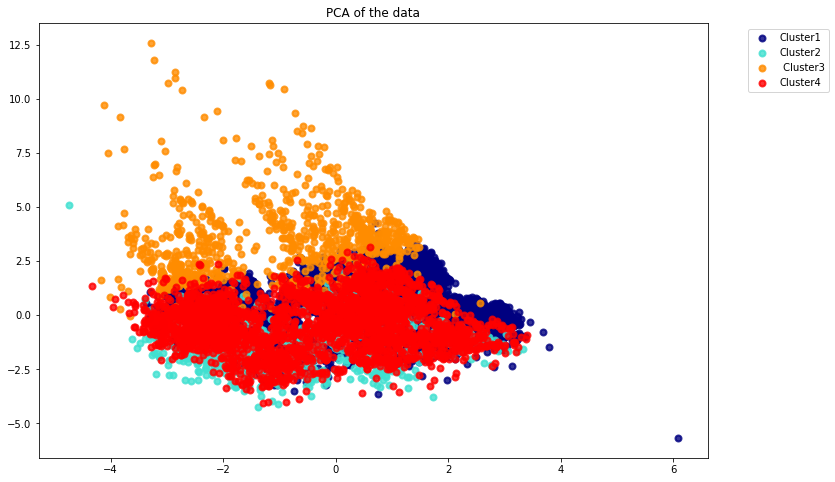

In [63]:
# Plotting the data 
plt.figure() # Initialise a Blank plot 
plt.figure(figsize=(12,8))
#colors= ['navy', 'turquoise', 'darkorange']
colors= ['navy', 'turquoise', 'darkorange', 'red']
lw=2
for color, i, target_names in zip(colors, [0,1,2,3], target_names):
    plt.scatter(X_r[y_num==i,0], X_r[y_num==i,1], color=color, alpha=.8, lw=lw, label=target_names)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.6)
plt.title('PCA of the data')
plt.show() 

# Performing KMeans after PCA (on first two components)

In [64]:
# From the scree plot, we see that maximum rate of change occurs at cluster =4
# Running KMeans on 4 clusters 
#kmeans1 = KMeans(n_clusters=4, n_init=20, random_state=540)
#kmeans1.fit(pca)

In [65]:
#kmeans1.labels_ # returns the labels 

# Performing PCA on the selected variables - 'Day_of_week',  'Clicks',
# 'Cost', 'CPC', 'CTR', 'Return_on_ad_spend (ROAS)', 'Conversion_rate_%',
# 'year', 'month', 'week_number'

In [66]:
X2=data_cleaned[['Unique_id','Day_of_week','Clicks','Cost','CPC','CTR', 'Return_on_ad_spend (ROAS)','year','month','week_number','Conversion_rate_%' ]]
X2.head()

,Unique_id,Day_of_week,Clicks,Cost,CPC,CTR,Return_on_ad_spend (ROAS),year,month,week_number,Conversion_rate_%
0,3,1,60,191.34,3.19,0.0368,0.55,2021,9,38,0.1100
1,3,0,57,220.83,3.87,0.0332,0.07,2021,9,36,0.0526
2,3,3,55,237.96,4.33,0.0336,0.08,2021,9,37,0.0455
3,3,0,52,173.83,3.34,0.0355,1.09,2021,9,37,0.1538
4,3,2,50,142.66,2.85,0.0373,0.74,2021,9,38,0.1600


In [67]:
X.columns

Index(['Unique_id', 'Day_of_week', 'Generic', 'Full_time_MBA', 'Exec_MBA ',
       'MBA_Ranking ', 'TAMU_MBA ', 'TAMU_Exec_MBA ', 'TAMU_ Online_MBA ',
       'Competitors', 'PMBA ', 'Clicks', 'Cost', 'CPC', 'CTR',
       'Return_on_ad_spend (ROAS)', 'Conversion_rate_%', 'year', 'month',
       'week_number'],
      dtype='object')

In [68]:
kmeans1 = KMeans(n_clusters=4, n_init=20, random_state=1000)
kmeans1.fit(X2)
kmeans1.labels_ # returns the labels 
print('The Clusters are:', kmeans1.labels_)
print("The Inertia is:", kmeans1.inertia_) # Inertia is the within cluster sum of squares 

The Clusters are: [3 3 3 ... 2 2 0]
The Inertia is: 12645452.297002582


In [69]:
type(kmeans1.labels_)

numpy.ndarray

In [70]:
no_of_clusters1=range(2,10)
inertia2= []
for a in no_of_clusters1:
    kmeans2=KMeans(n_clusters=a, n_init=20, random_state=540)
    kmeans2=kmeans2.fit(X2)
    u=kmeans2.inertia_
    inertia2.append(u)
    print("The inertia for", a, "Cluster is:", u)

The inertia for 2 Cluster is: 22276724.305324618
The inertia for 3 Cluster is: 15794281.11768103
The inertia for 4 Cluster is: 12645421.552645296
The inertia for 5 Cluster is: 11034438.019693019
The inertia for 6 Cluster is: 9657437.783206167
The inertia for 7 Cluster is: 8570349.372440342
The inertia for 8 Cluster is: 7572948.434649424
The inertia for 9 Cluster is: 6852709.165777004


Text(0.5, 1.0, ' Scree Plot of Inertia_Score Vs No_of_clusters')

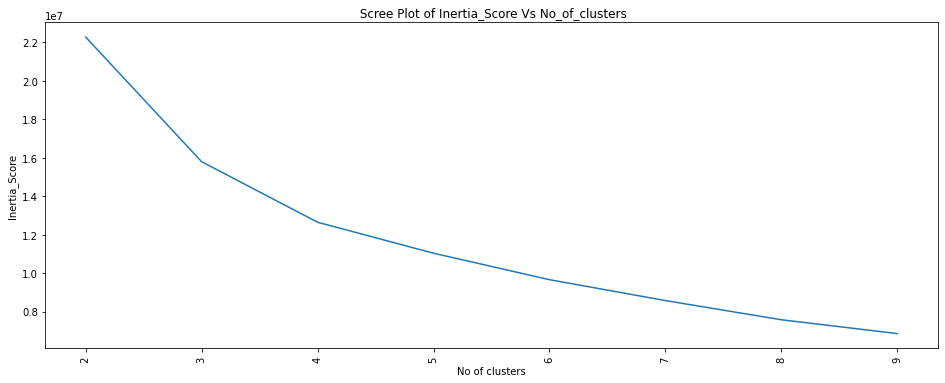

In [71]:
# Creating the scree plot for inertia- Elbow method 
fig, (ax2)=plt.subplots(1,figsize=(16,6))
xx1=np.arange(len(no_of_clusters1))
ax2.plot(xx1,inertia2)
ax2.set_xticks(xx1)
ax2.set_xticklabels(no_of_clusters1,rotation="vertical")
plt.xlabel("No of clusters")
plt.ylabel("Inertia_Score")
plt.title(" Scree Plot of Inertia_Score Vs No_of_clusters")

In [72]:
# PCA on the new data 

In [73]:
# Scaling the data before we proceed with PCA 
scaler=StandardScaler()
scaler.fit(X2)

StandardScaler()

In [74]:
X2.scaled=scaler.transform(X2)
type(X2.scaled)

<ipython-input-74-c53562b52479>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X2.scaled=scaler.transform(X2)


numpy.ndarray

In [75]:
X2.scaled.shape

(12126, 11)

In [76]:
y_num1=kmeans1.labels_
target_names1=["Cluster1","Cluster2"," Cluster3","Cluster4"]
pca1=PCA(n_components=10, random_state=600) # Performing PCA on 10 components 
X_r1= pca1.fit(X2.scaled).transform(X2.scaled)  

In [77]:
X_r1.shape

(12126, 10)

In [78]:
# Percentage of Variance explained by the first two components 
print("Explained Variance Ratio (10 Principal Components: %s" % str(pca1.explained_variance_ratio_)) 

Explained Variance Ratio (10 Principal Components: [0.24667284 0.18078832 0.12477183 0.10898412 0.09089485 0.08747977
 0.07191879 0.05073351 0.02382556 0.01147727]


In [79]:
# Cumulative proportion of variance (from PC1 to PC10)   
np.cumsum(pca1.explained_variance_ratio_)

array([0.24667284, 0.42746116, 0.55223298, 0.66121711, 0.75211196,
       0.83959173, 0.91151052, 0.96224403, 0.98606959, 0.99754686])

In [80]:
#Hence the first five components explain 75% of the variance 

<Figure size 432x288 with 0 Axes>

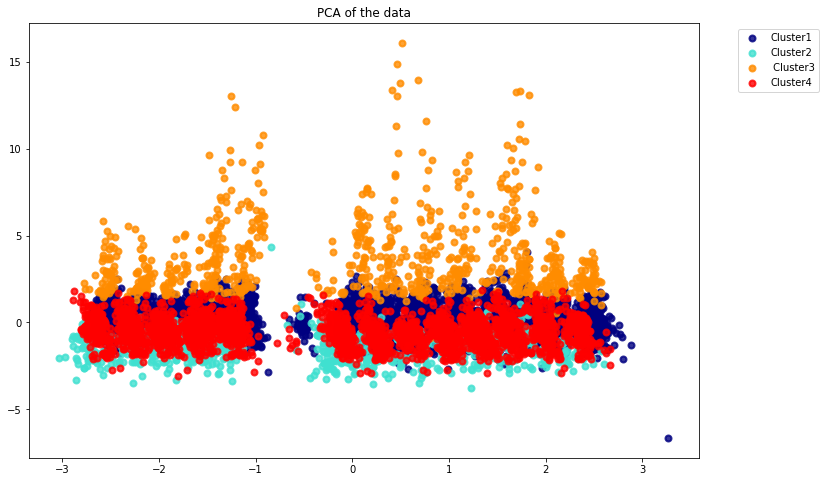

In [81]:
# Plotting the first two Principal Components 
plt.figure() # Initialise a Blank plot 
plt.figure(figsize=(12,8))
colors= ['navy', 'turquoise', 'darkorange','red']
lw=2
for color, i, target_names1 in zip(colors, [0,1,2,3], target_names1):
    plt.scatter(X_r1[y_num==i,0], X_r1[y_num==i,1], color=color, alpha=.8, lw=lw, label=target_names1)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.6)
plt.title('PCA of the data')
plt.show()

In [82]:
# Adding the cluster id for second analysis to the cleaned dataset dataframe 
df1['cluster_id1'] = kmeans1.labels_.tolist()

In [83]:
# Finding the number of clusters 
unique, counts1=np.unique(kmeans1.labels_, return_counts= True)
counts1= counts1.reshape(1,4)
counts1

array([[ 811, 7599, 2900,  816]])

In [84]:
df1.head() 

,Keywords,Unique_id,Date,Day_of_week,Generic,Full_time_MBA,Exec_MBA,MBA_Ranking,TAMU_MBA,TAMU_Exec_MBA,...,Cost,CPC,CTR,Return_on_ad_spend (ROAS),Conversion_rate_%,year,month,week_number,Cluster_id,cluster_id1
0,MBA EDUCATION,3,2021-09-20,1,1,0,0,0,0,0,...,191.34,3.19,0.0368,0.55,0.1100,2021,9,38,2,3
1,MBA EDUCATION,3,2021-09-12,0,1,0,0,0,0,0,...,220.83,3.87,0.0332,0.07,0.0526,2021,9,36,2,3
2,MBA EDUCATION,3,2021-09-15,3,1,0,0,0,0,0,...,237.96,4.33,0.0336,0.08,0.0455,2021,9,37,2,3
3,MBA EDUCATION,3,2021-09-19,0,1,0,0,0,0,0,...,173.83,3.34,0.0355,1.09,0.1538,2021,9,37,2,3
4,MBA EDUCATION,3,2021-09-21,2,1,0,0,0,0,0,...,142.66,2.85,0.0373,0.74,0.1600,2021,9,38,2,3


In [85]:
df1.shape
df_full=df1

In [86]:
df_new=df_full.sort_values(by="Cluster_id",ascending=False, kind= "mergesort")
df_new.head()
# We see that the cluster id doesnt match when Kmeans is run on full dataset and when it is run on few columns only 

,Keywords,Unique_id,Date,Day_of_week,Generic,Full_time_MBA,Exec_MBA,MBA_Ranking,TAMU_MBA,TAMU_Exec_MBA,...,Cost,CPC,CTR,Return_on_ad_spend (ROAS),Conversion_rate_%,year,month,week_number,Cluster_id,cluster_id1
1072,MBA EXECUTIVE UNIVERSITY,44,2022-04-23,6,1,0,1,0,0,0,...,60.57,10.10,0.0199,0.41,0.1667,2022,4,16,3,2
1076,TEXAS A&M BUSINESS COLLEGE,72,2022-04-27,3,0,0,0,0,1,0,...,11.92,1.99,0.0923,0.00,0.0000,2022,4,17,3,2
1089,A&M MBA UNIVERSITY,64,2022-05-11,3,1,0,0,0,1,0,...,5.56,0.93,0.6667,0.00,0.0000,2022,5,19,3,2
1414,MAYS MBA PROGRAM,93,2022-02-06,0,0,0,0,0,1,0,...,21.21,4.24,0.5556,0.00,0.0000,2022,2,5,3,2
1457,MBA EXECUTIVE UNIVERSITY,44,2022-03-27,0,1,0,1,0,0,0,...,47.53,9.51,0.0505,0.00,0.0000,2022,3,12,3,2


In [87]:
#df_new.columns

# Performing Clustering on selected uncorrelated features 

In [88]:
X_clus=data_cleaned[['Unique_id','Day_of_week','CPC','CTR','month' ]]
X_clus.head()

,Unique_id,Day_of_week,CPC,CTR,month
0,3,1,3.19,0.0368,9
1,3,0,3.87,0.0332,9
2,3,3,4.33,0.0336,9
3,3,0,3.34,0.0355,9
4,3,2,2.85,0.0373,9


In [89]:
kmeans3 = KMeans(n_clusters=4, n_init=20, random_state=1001)
#kmeans3 = KMeans(n_clusters=3, n_init=20, random_state=1001)
kmeans3.fit(X_clus)
kmeans3.labels_ # returns the labels 
print('The Clusters are:', kmeans3.labels_)
print("The Inertia is:", kmeans3.inertia_) # Inertia is the within cluster sum of squares 

The Clusters are: [0 0 0 ... 1 1 3]
The Inertia is: 3217958.2814997765


In [90]:
no_of_clusters1=range(2,5)
inertia3= []
for a in no_of_clusters1:
    kmeans3=KMeans(n_clusters=a, n_init=20, random_state=600)
    kmeans3=kmeans3.fit(X_clus)
    u=kmeans3.inertia_
    inertia3.append(u)
    print("The inertia for", a, "Cluster is:", u)

The inertia for 2 Cluster is: 8049779.355085331
The inertia for 3 Cluster is: 4720209.549439736
The inertia for 4 Cluster is: 3217958.2814997765


Text(0.5, 1.0, ' Scree Plot of Inertia_Score Vs No_of_clusters')

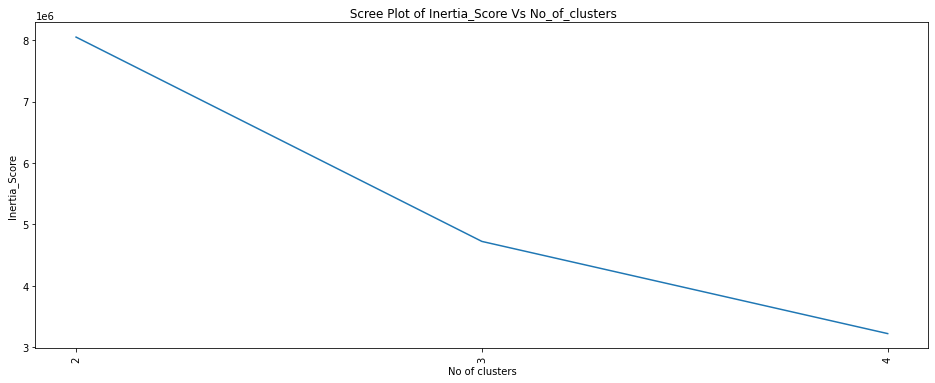

In [91]:
fig, (ax3)=plt.subplots(1,figsize=(16,6))
xx2=np.arange(len(no_of_clusters1))
ax3.plot(xx2,inertia3)
ax3.set_xticks(xx2)
ax3.set_xticklabels(no_of_clusters1,rotation="vertical")
plt.xlabel("No of clusters")
plt.ylabel("Inertia_Score")
plt.title(" Scree Plot of Inertia_Score Vs No_of_clusters")

In [92]:
df1['cluster_id2'] = kmeans3.labels_.tolist()

In [93]:
unique, counts2=np.unique(kmeans3.labels_, return_counts= True)
counts2= counts2.reshape(1,4)
counts2

array([[6578, 1511, 3538,  499]])

In [94]:
df1.head()

,Keywords,Unique_id,Date,Day_of_week,Generic,Full_time_MBA,Exec_MBA,MBA_Ranking,TAMU_MBA,TAMU_Exec_MBA,...,CPC,CTR,Return_on_ad_spend (ROAS),Conversion_rate_%,year,month,week_number,Cluster_id,cluster_id1,cluster_id2
0,MBA EDUCATION,3,2021-09-20,1,1,0,0,0,0,0,...,3.19,0.0368,0.55,0.1100,2021,9,38,2,3,0
1,MBA EDUCATION,3,2021-09-12,0,1,0,0,0,0,0,...,3.87,0.0332,0.07,0.0526,2021,9,36,2,3,0
2,MBA EDUCATION,3,2021-09-15,3,1,0,0,0,0,0,...,4.33,0.0336,0.08,0.0455,2021,9,37,2,3,0
3,MBA EDUCATION,3,2021-09-19,0,1,0,0,0,0,0,...,3.34,0.0355,1.09,0.1538,2021,9,37,2,3,0
4,MBA EDUCATION,3,2021-09-21,2,1,0,0,0,0,0,...,2.85,0.0373,0.74,0.1600,2021,9,38,2,3,0


In [95]:
#Performing PCA 

In [96]:
# Scaling the data before we proceed with PCA 
scaler=StandardScaler()
scaler.fit(X_clus)

StandardScaler()

In [97]:
X_clus.scaled=scaler.transform(X_clus)
type(X_clus.scaled)

<ipython-input-97-ece1b6fdc567>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_clus.scaled=scaler.transform(X_clus)


numpy.ndarray

In [98]:
X_clus.scaled.shape

(12126, 5)

In [99]:
y_num2=kmeans3.labels_
target_names2=["Cluster1","Cluster2"," Cluster3","Cluster4"]
pca2=PCA(n_components=5, random_state=600) # Performing PCA on 5 components 
X_r2= pca2.fit(X_clus.scaled).transform(X_clus.scaled)  

In [100]:
# Percentage of Variance explained by the first two components 
print("Explained Variance Ratio (5 Principal Components: %s" % str(pca2.explained_variance_ratio_)) 

Explained Variance Ratio (5 Principal Components: [0.27021871 0.2189913  0.2008683  0.19775336 0.11216834]


In [101]:
# Cumulative proportion of variance (from PC1 to PC10)   
np.cumsum(pca2.explained_variance_ratio_)

array([0.27021871, 0.48921001, 0.69007831, 0.88783166, 1.        ])

<Figure size 432x288 with 0 Axes>

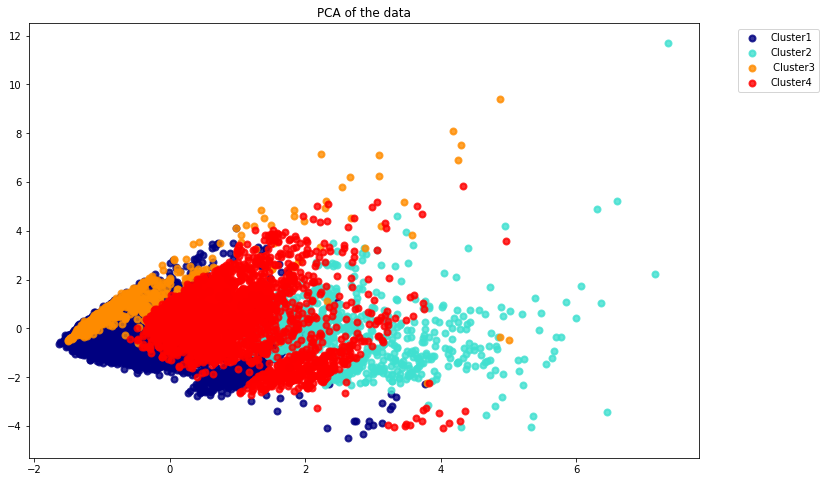

In [102]:
# Plotting the first two Principal Components 
plt.figure() # Initialise a Blank plot 
plt.figure(figsize=(12,8))
colors= ['navy', 'turquoise', 'darkorange','red']
lw=2
for color, i, target_names2 in zip(colors, [0,1,2,3], target_names2):
    plt.scatter(X_r2[y_num==i,0], X_r2[y_num==i,1], color=color, alpha=.8, lw=lw, label=target_names2)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.6)
plt.title('PCA of the data')
plt.show()

# Plotting Scatter Plots between CPC and Time frame for different categorical variables 

In [103]:
# Filtering the Values for Generic=1
df_Generic1 = df_full[df_full["Generic"] == 1]
df_Generic1.head()

,Keywords,Unique_id,Date,Day_of_week,Generic,Full_time_MBA,Exec_MBA,MBA_Ranking,TAMU_MBA,TAMU_Exec_MBA,...,CPC,CTR,Return_on_ad_spend (ROAS),Conversion_rate_%,year,month,week_number,Cluster_id,cluster_id1,cluster_id2
0,MBA EDUCATION,3,2021-09-20,1,1,0,0,0,0,0,...,3.19,0.0368,0.55,0.1100,2021,9,38,2,3,0
1,MBA EDUCATION,3,2021-09-12,0,1,0,0,0,0,0,...,3.87,0.0332,0.07,0.0526,2021,9,36,2,3,0
2,MBA EDUCATION,3,2021-09-15,3,1,0,0,0,0,0,...,4.33,0.0336,0.08,0.0455,2021,9,37,2,3,0
3,MBA EDUCATION,3,2021-09-19,0,1,0,0,0,0,0,...,3.34,0.0355,1.09,0.1538,2021,9,37,2,3,0
4,MBA EDUCATION,3,2021-09-21,2,1,0,0,0,0,0,...,2.85,0.0373,0.74,0.1600,2021,9,38,2,3,0


In [104]:
df_Generic1.shape

(4769, 25)

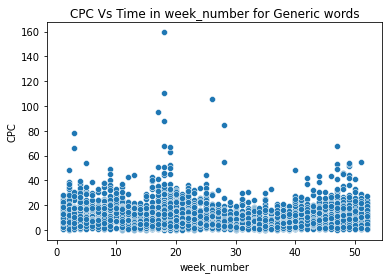

In [105]:
# making a scatter plot for Generic=1
sns.scatterplot(data=df_Generic1, x="week_number", y="CPC"). set(title="CPC Vs Time in week_number for Generic words"); 
#df_Generic1.plot(x='week_number', y='cpc', style='o')

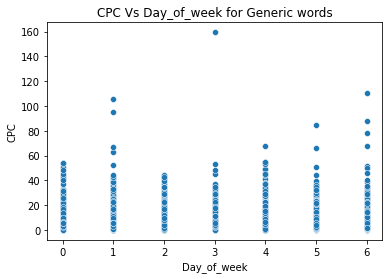

In [106]:
sns.scatterplot(data=df_Generic1, x="Day_of_week", y="CPC"). set(title="CPC Vs Day_of_week for Generic words"); 

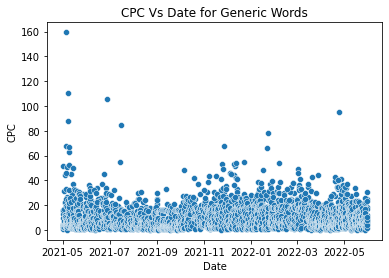

In [107]:
sns.scatterplot(data=df_Generic1, x="Date", y="CPC").set(title="CPC Vs Date for Generic Words"); 

In [108]:
df_Generic0 = df_full[df_full["Generic"] == 0]
df_Generic0.shape

(7357, 25)

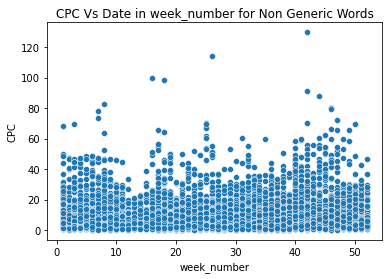

In [109]:
sns.scatterplot(data=df_Generic0, x="week_number", y="CPC").set(title="CPC Vs Date in week_number for Non Generic Words"); 

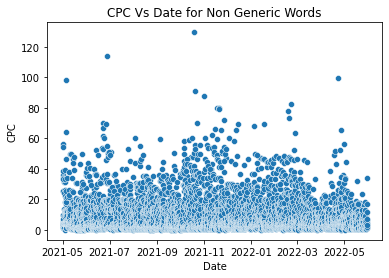

In [110]:
sns.scatterplot(data=df_Generic0, x="Date", y="CPC").set(title="CPC Vs Date for Non Generic Words"); 

In [111]:
#pal = dict(Lunch="seagreen", Dinner=".7")
#g = sns.FacetGrid(tips, hue="time", palette=pal, height=5)
#g.map(sns.scatterplot, "total_bill", "tip", s=100, alpha=.5)
#g.add_legend()

# Exporting dataframe to excel 

In [112]:
file_name = 'Ad_campaign_dataset.xlsx'
df_full.to_excel(file_name)

In [ ]:
# Checking the total count of unique id values match with the cluster_id2

In [161]:
df_Unid_0 = df_full[df_full["cluster_id2"] == 0]
df_Unid_0.shape

(6578, 25)

In [159]:
df_full.head()

,Keywords,Unique_id,Date,Day_of_week,Generic,Full_time_MBA,Exec_MBA,MBA_Ranking,TAMU_MBA,TAMU_Exec_MBA,...,CPC,CTR,Return_on_ad_spend (ROAS),Conversion_rate_%,year,month,week_number,Cluster_id,cluster_id1,cluster_id2
0,MBA EDUCATION,3,2021-09-20,1,1,0,0,0,0,0,...,3.19,0.0368,0.55,0.1100,2021,9,38,2,3,0
1,MBA EDUCATION,3,2021-09-12,0,1,0,0,0,0,0,...,3.87,0.0332,0.07,0.0526,2021,9,36,2,3,0
2,MBA EDUCATION,3,2021-09-15,3,1,0,0,0,0,0,...,4.33,0.0336,0.08,0.0455,2021,9,37,2,3,0
3,MBA EDUCATION,3,2021-09-19,0,1,0,0,0,0,0,...,3.34,0.0355,1.09,0.1538,2021,9,37,2,3,0
4,MBA EDUCATION,3,2021-09-21,2,1,0,0,0,0,0,...,2.85,0.0373,0.74,0.1600,2021,9,38,2,3,0


In [113]:
df_Competitors1 = df_full[df_full["Competitors"] == 1]
df_Competitors1.shape

(752, 25)

In [156]:
df_full.columns 


Index(['Keywords', 'Unique_id', 'Date', 'Day_of_week', 'Generic',
       'Full_time_MBA', 'Exec_MBA ', 'MBA_Ranking ', 'TAMU_MBA ',
       'TAMU_Exec_MBA ', 'TAMU_ Online_MBA ', 'Competitors', 'PMBA ', 'Clicks',
       'Cost', 'CPC', 'CTR', 'Return_on_ad_spend (ROAS)', 'Conversion_rate_%',
       'year', 'month', 'week_number', 'Cluster_id', 'cluster_id1',
       'cluster_id2'],
      dtype='object')

In [157]:
print(df_full['Unique_id'].value_counts())

2      416
6      401
4      397
5      356
1      350
      ... 
251      1
270      1
286      1
272      1
279      1
Name: Unique_id, Length: 191, dtype: int64


In [158]:
print(df_full['cluster_id2'].value_counts())

0    6578
2    3538
1    1511
3     499
Name: cluster_id2, dtype: int64


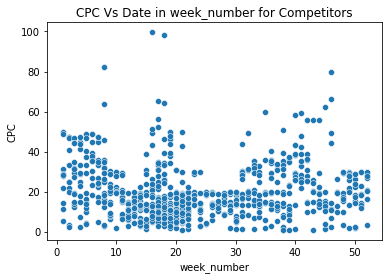

In [114]:
sns.scatterplot(data=df_Competitors1, x="week_number", y="CPC").set(title="CPC Vs Date in week_number for Competitors");

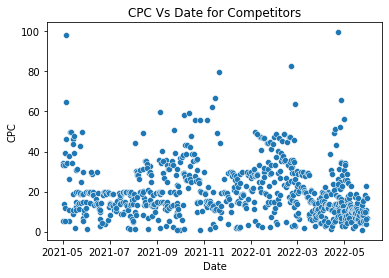

In [115]:
sns.scatterplot(data=df_Competitors1, x="Date", y="CPC").set(title="CPC Vs Date for Competitors"); 

In [116]:
df_TAMU_MBA1 = df_full[df_full["TAMU_MBA "] == 1]
df_TAMU_MBA1.shape

(4924, 25)

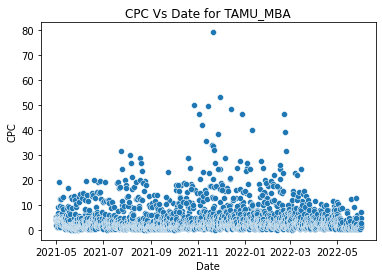

In [117]:
sns.scatterplot(data=df_TAMU_MBA1, x="Date", y="CPC"). set(title="CPC Vs Date for TAMU_MBA"); 

In [118]:
df_TAMU_MBA0 = df_full[df_full["TAMU_MBA "] == 0]
df_TAMU_MBA0.shape

(7202, 25)

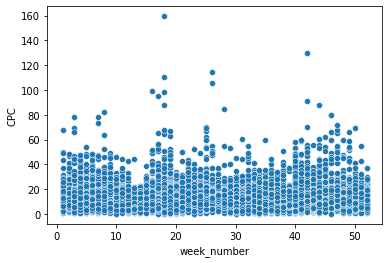

In [119]:
sns.scatterplot(data=df_TAMU_MBA0, x="week_number", y="CPC"); 

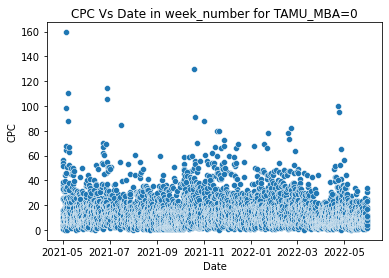

In [120]:
sns.scatterplot(data=df_TAMU_MBA0, x="Date", y="CPC").set(title="CPC Vs Date in week_number for TAMU_MBA=0"); 

In [121]:
#sns.boxplot(data=df_TAMU_MBA0, x='Date', y='CPC');
#sns.boxplot(data=df, x='team', y='points').set(title='Points by Team')

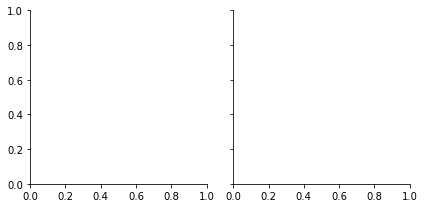

In [122]:
# Comparative Analysis for TAMU_MBA and Competitors 
g = sns.FacetGrid(df1, col="Generic")

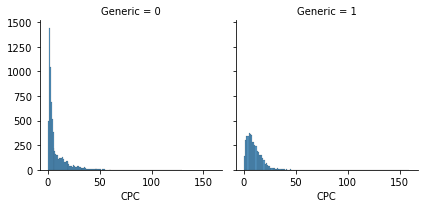

In [123]:
g = sns.FacetGrid(df1, col="Generic"); 
g.map(sns.histplot, "CPC"); # The Histogram shows the count of CPC for Generic and Non Generic Words

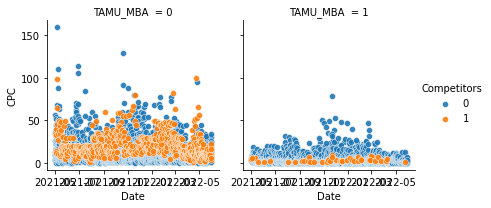

In [124]:
# Comparative Analysis for TAMU_MBA and Competitors 
g = sns.FacetGrid(df1, col='TAMU_MBA ', hue="Competitors"); 
g.map(sns.scatterplot, "Date","CPC", alpha=.9);
g.add_legend(); 
# 

In [125]:
df_full.head()
df_full.shape

(12126, 25)

In [126]:
# Sorting the column on the basis of keywords
df_full.columns

Index(['Keywords', 'Unique_id', 'Date', 'Day_of_week', 'Generic',
       'Full_time_MBA', 'Exec_MBA ', 'MBA_Ranking ', 'TAMU_MBA ',
       'TAMU_Exec_MBA ', 'TAMU_ Online_MBA ', 'Competitors', 'PMBA ', 'Clicks',
       'Cost', 'CPC', 'CTR', 'Return_on_ad_spend (ROAS)', 'Conversion_rate_%',
       'year', 'month', 'week_number', 'Cluster_id', 'cluster_id1',
       'cluster_id2'],
      dtype='object')

In [127]:
# Finding the correlation between the features
corr1=df_full.corr()
corr1 
# From the coorelation below; 
#1. There is a high coorelation between Cluster_id and Cluster_id1, Cluster_id and week_number

,Unique_id,Day_of_week,Generic,Full_time_MBA,Exec_MBA,MBA_Ranking,TAMU_MBA,TAMU_Exec_MBA,TAMU_ Online_MBA,Competitors,...,CPC,CTR,Return_on_ad_spend (ROAS),Conversion_rate_%,year,month,week_number,Cluster_id,cluster_id1,cluster_id2
Unique_id,1.000000,-0.033628,-0.116918,0.249235,0.304151,0.290299,-0.178012,0.063003,-0.013365,0.204787,...,0.235763,0.305795,-0.011132,-0.023485,0.097162,-0.058668,-0.061918,0.502130,-0.130778,0.684865
Day_of_week,-0.033628,1.000000,0.007975,-0.008137,-0.002406,-0.014740,0.007588,-0.006524,-0.003456,-0.004768,...,-0.011363,0.010027,0.012021,0.000168,-0.015464,0.011556,0.006297,-0.019912,-0.003714,-0.019382
Generic,-0.116918,0.007975,1.000000,0.110680,-0.273201,0.160046,-0.513436,-0.169563,-0.106883,-0.191622,...,0.110132,-0.366856,-0.029666,-0.052018,0.104701,-0.042241,-0.041472,0.046295,0.196331,-0.059965
Full_time_MBA,0.249235,-0.008137,0.110680,1.000000,-0.105677,-0.051121,-0.109324,-0.047117,-0.029700,0.064443,...,0.177601,0.050474,-0.010559,-0.032245,0.045074,-0.025889,-0.029080,0.298513,0.113084,0.209550
Exec_MBA,0.304151,-0.002406,-0.273201,-0.105677,1.000000,0.023348,-0.319695,-0.012649,-0.021784,0.181347,...,0.346101,0.034146,-0.022468,-0.035034,0.013601,0.004956,0.003613,0.185750,0.016387,0.340211
MBA_Ranking,0.290299,-0.014740,0.160046,-0.051121,0.023348,1.000000,-0.172167,-0.051293,0.036407,-0.062624,...,0.030770,-0.038259,-0.008215,-0.008354,0.158561,-0.073596,-0.072706,0.183247,0.027224,0.166884
TAMU_MBA,-0.178012,0.007588,-0.513436,-0.109324,-0.319695,-0.172167,1.000000,-0.174141,-0.109768,-0.181279,...,-0.468361,0.254463,0.033706,0.082325,-0.110987,0.026422,0.027199,-0.291904,-0.244774,-0.093037
TAMU_Exec_MBA,0.063003,-0.006524,-0.169563,-0.047117,-0.012649,-0.051293,-0.174141,1.000000,-0.027958,-0.054153,...,-0.028996,0.326111,0.036186,0.026964,-0.018593,-0.002501,-0.002194,0.038831,0.013541,0.049700
TAMU_ Online_MBA,-0.013365,-0.003456,-0.106883,-0.029700,-0.021784,0.036407,-0.109768,-0.027958,1.000000,-0.034135,...,-0.061708,0.048742,0.002263,-0.006249,0.005345,0.031032,0.031660,-0.053728,-0.044151,-0.078695
Competitors,0.204787,-0.004768,-0.191622,0.064443,0.181347,-0.062624,-0.181279,-0.054153,-0.034135,1.000000,...,0.284552,0.053888,-0.012945,-0.032687,0.048450,-0.029855,-0.028809,0.275998,0.102168,0.230340


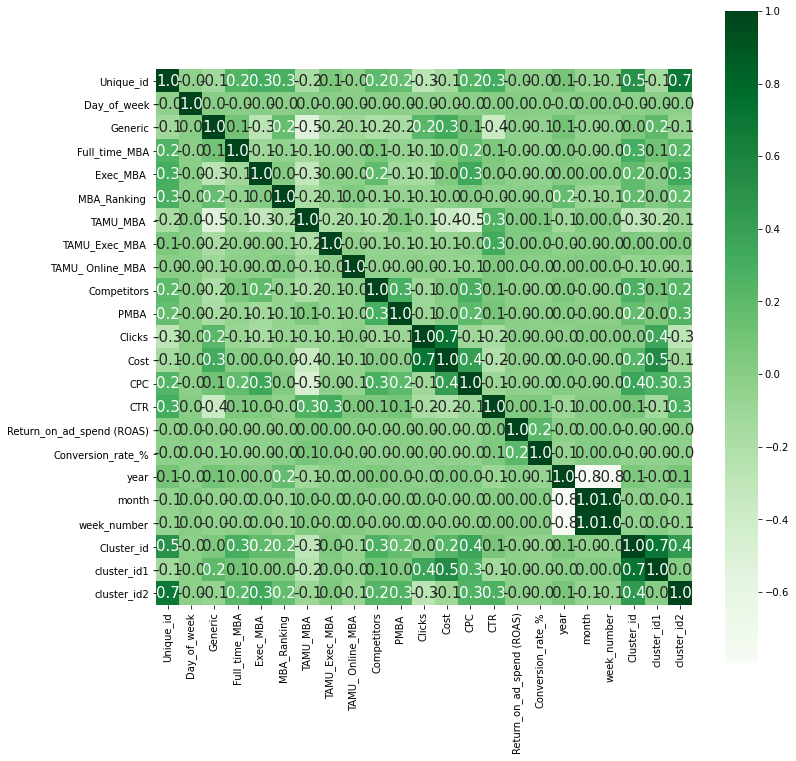

In [128]:
plt.figure(figsize=(12,12))
sns.heatmap(corr1, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens');

In [129]:
# There is a high coorelation between Cluster_id and cluster_id1- 0.7 
# High Coorelation between Cluster_id and week_number, month, year- 0.8, 0.8, 0.6 
# Coorelation between Cluster_id and Cost or CPC - 0.3 while between cluster_id and Generic and Tamu_MBA is 0.2 

# Matching the key words in the column for different cluster labels 

In [130]:
# Selecting the keywords for different cluster labels 
df_1clus0=df_full[df_full['Cluster_id'] == 0]
df_1clus1=df_full[df_full['Cluster_id'] == 1]
df_1clus2=df_full[df_full['Cluster_id'] == 2]
df_1clus3=df_full[df_full['Cluster_id'] == 3]
df_2clus0=df_full[df_full['cluster_id1'] == 0]
df_2clus1=df_full[df_full['cluster_id1'] == 1]
df_2clus2=df_full[df_full['cluster_id1'] == 2]
df_2clus3=df_full[df_full['cluster_id1'] == 3]

In [131]:
#Exporting the data into excel 
#file_name = 'A1Cluster0.xlsx'
df_1clus0.to_excel('A1Cluster0.xlsx')
df_1clus1.to_excel('A1Cluster1.xlsx')
df_1clus2.to_excel('A1Cluster2.xlsx')
df_1clus3.to_excel('A1Cluster3.xlsx')
df_2clus0.to_excel('A2Cluster0.xlsx')
df_2clus1.to_excel('A2Cluster1.xlsx')
df_2clus2.to_excel('A2Cluster2.xlsx')
df_2clus3.to_excel('A2Cluster3.xlsx')

In [132]:
df_grouped = df_full.groupby('Cluster_id', axis=0)
df_grouped.head(20)
#df_grouped.get_group(0)

,Keywords,Unique_id,Date,Day_of_week,Generic,Full_time_MBA,Exec_MBA,MBA_Ranking,TAMU_MBA,TAMU_Exec_MBA,...,CPC,CTR,Return_on_ad_spend (ROAS),Conversion_rate_%,year,month,week_number,Cluster_id,cluster_id1,cluster_id2
0,MBA EDUCATION,3,2021-09-20,1,1,0,0,0,0,0,...,3.19,0.0368,0.55,0.1100,2021,9,38,2,3,0
1,MBA EDUCATION,3,2021-09-12,0,1,0,0,0,0,0,...,3.87,0.0332,0.07,0.0526,2021,9,36,2,3,0
2,MBA EDUCATION,3,2021-09-15,3,1,0,0,0,0,0,...,4.33,0.0336,0.08,0.0455,2021,9,37,2,3,0
3,MBA EDUCATION,3,2021-09-19,0,1,0,0,0,0,0,...,3.34,0.0355,1.09,0.1538,2021,9,37,2,3,0
4,MBA EDUCATION,3,2021-09-21,2,1,0,0,0,0,0,...,2.85,0.0373,0.74,0.1600,2021,9,38,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3453,TAMU PMBA,120,2021-05-12,3,0,0,0,0,1,0,...,3.58,1.0000,0.00,0.0000,2021,5,19,1,0,1
3498,TAMU PMBA,120,2021-05-18,2,0,0,0,0,1,0,...,1.33,1.0000,0.00,0.0000,2021,5,20,1,0,1
3507,TAMU PMBA,120,2021-05-20,4,0,0,0,0,1,0,...,2.95,0.6667,0.00,0.0000,2021,5,20,1,0,1
3524,MBA EXECUTIVE SCHOOL,116,2021-05-22,6,0,0,1,0,0,0,...,15.05,1.0000,0.00,0.0000,2021,5,20,1,0,1


In [133]:
# Create Dummy variables for Month, Day_of_week, Week_number, year
df_d1=pd.get_dummies(df_full, columns=['month'], drop_first=True)
df_d1.head()
df_d2=pd.get_dummies(df_d1, columns=['Day_of_week'], drop_first=True)
df_d2.head()
df_d3=pd.get_dummies(df_d2, columns=['week_number'], drop_first=True)
df_d3.head()
df_d4=pd.get_dummies(df_d3, columns=['year'], drop_first=True)
df_d4.head()

,Keywords,Unique_id,Date,Generic,Full_time_MBA,Exec_MBA,MBA_Ranking,TAMU_MBA,TAMU_Exec_MBA,TAMU_ Online_MBA,...,week_number_44,week_number_45,week_number_46,week_number_47,week_number_48,week_number_49,week_number_50,week_number_51,week_number_52,year_2022
0,MBA EDUCATION,3,2021-09-20,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,MBA EDUCATION,3,2021-09-12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,MBA EDUCATION,3,2021-09-15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,MBA EDUCATION,3,2021-09-19,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,MBA EDUCATION,3,2021-09-21,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
df_new= df_d4
df_new.shape

(12126, 90)

# Linear Regression 

In [135]:
# Creating a target variable and dependent variables for perfroming OLS 
X_1=df_new.drop(['Keywords','Date'], axis = 1) # Dropping the keywords and date column 
X_new=X_1.drop(['CTR'], axis = 1)
Y_new=df_new['CTR']

In [136]:
X_new.head()
X_new.columns

Index(['Unique_id', 'Generic', 'Full_time_MBA', 'Exec_MBA ', 'MBA_Ranking ',
       'TAMU_MBA ', 'TAMU_Exec_MBA ', 'TAMU_ Online_MBA ', 'Competitors',
       'PMBA ', 'Clicks', 'Cost', 'CPC', 'Return_on_ad_spend (ROAS)',
       'Conversion_rate_%', 'Cluster_id', 'cluster_id1', 'cluster_id2',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'Day_of_week_1', 'Day_of_week_2', 'Day_of_week_3', 'Day_of_week_4',
       'Day_of_week_5', 'Day_of_week_6', 'week_number_2', 'week_number_3',
       'week_number_4', 'week_number_5', 'week_number_6', 'week_number_7',
       'week_number_8', 'week_number_9', 'week_number_10', 'week_number_11',
       'week_number_12', 'week_number_13', 'week_number_14', 'week_number_15',
       'week_number_16', 'week_number_17', 'week_number_18', 'week_number_19',
       'week_number_20', 'week_number_21', 'week_number_22', 'week_number_23',
       'week_number_24', 'week

In [137]:
X_new.head()
type(X_new)

pandas.core.frame.DataFrame

In [138]:
type(Y_new)

pandas.core.series.Series

In [139]:
import statsmodels.api as sm

In [140]:
X_new1 = sm.add_constant(X_new)

In [141]:
model = sm.OLS(Y_new,X_new1).fit()
model

In [142]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     84.55
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:39:58   Log-Likelihood:                 313.37
No. Observations:               12126   AIC:                            -450.7
Df Residuals:                   12038   BIC:                             200.7
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [143]:
#X_new1=X_new.drop(['const'], axis=1)
#X_new1.head()

# Regression after grouping of the data 

In [144]:
X_new_group=X_new1.groupby('Cluster_id', axis=0)#Group the dependent variables based on cluster
X_new_group.head()

,const,Unique_id,Generic,Full_time_MBA,Exec_MBA,MBA_Ranking,TAMU_MBA,TAMU_Exec_MBA,TAMU_ Online_MBA,Competitors,...,week_number_44,week_number_45,week_number_46,week_number_47,week_number_48,week_number_49,week_number_50,week_number_51,week_number_52,year_2022
0,1.0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189,1.0,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,1.0,5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223,1.0,5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
model1 = sm.OLS(Y_new,X_new1, data=X_new_group).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTR   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     84.55
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:40:10   Log-Likelihood:                 313.37
No. Observations:               12126   AIC:                            -450.7
Df Residuals:                   12038   BIC:                             200.7
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1391      0.024      5.796      0.000       0.092       0.186
Unique_id                     0.0024      0.000     19.737      0.000       0.002       0.003
Generic                      -0.0028      0.009     -0.318      0.751      -0.020       0.015
Full_time_MBA                 0.0687      0.012      5.745      0.000       0.045       0.092
Exec_MBA                      0.0537      0.010      5.470      0.000       0.034       0.073
MBA_Ranking                  -0.0064      0.011     -0.598      0.550      -0.028       0.015
TAMU_MBA                      0.2395      0.009     25.516      0.000       0.221       0.258
TAMU_Exec_MBA                 0.5651      0.014     40.838      0.000       0.538       0.592
TAMU_ Online_MBA              0.2819      0.018     15.276      0.000       0.246       0.318
Competitors                   0.0925      0.011      8.508      0.000       0.071       0.114
PMBA                          0.0401      0.011      3.682      0.000       0.019       0.061
Clicks                        0.0011      0.001      1.043      0.297      -0.001       0.003
Cost                          0.0002      0.000      1.449      0.147   -8.74e-05       0.001
CPC                          -0.0013      0.000     -3.533      0.000      -0.002      -0.001
Return_on_ad_spend (ROAS)     0.0003      0.000      1.163      0.245      -0.000       0.001
Conversion_rate_%             0.0212      0.010      2.142      0.032       0.002       0.041
Cluster_id                   -0.0188      0.005     -3.424      0.001      -0.030      -0.008
cluster_id1                   0.0239      0.010      2.479      0.013       0.005       0.043
cluster_id2                   0.0238      0.004      6.727      0.000       0.017       0.031
month_2                       0.0281      0.049      0.572      0.567      -0.068       0.125
month_3                       0.0444      0.068      0.649      0.517      -0.090       0.179
month_4                       0.0079      0.076      0.104      0.917      -0.142       0.157
month_5                      -0.0166      0.082     -0.204      0.839      -0.176       0.143
month_6                      -0.0482      0.089     -0.543      0.587      -0.222       0.126
month_7                      -0.0465      0.097     -0.478      0.633      -0.238       0.144
month_8                       0.0160      0.111      0.144      0.885      -0.202       0.234
month_9                      -0.0398      0.117     -0.339      0.734      -0.270       0.190
month_10                     -0.0395      0.122     -0.323      0.747      -0.279       0.200
month_11                     -0.1973      0.057     -3.479      0.001      -0.308      -0.086
month_12                     -0.1408      0.042     -3.382      0.001      

# Regression after dropping the cluster ids, % Conversion Rate, Return on ad spend 

In [146]:
X_new2=X_new.drop(['Return_on_ad_spend (ROAS)','Conversion_rate_%','Cluster_id','cluster_id1', 'Clicks','Cost','cluster_id2','month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'], axis = 1)

In [147]:
X_new3 = sm.add_constant(X_new2)

In [148]:
model2=sm.OLS(Y_new, X_new3).fit()

In [149]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:40:26   Log-Likelihood:                 260.64
No. Observations:               12126   AIC:                            -381.3
Df Residuals:                   12056   BIC:                             136.9
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1411      0.02

# Regression after dropping the categorical variables 

In [150]:
X_new2.columns

Index(['Unique_id', 'Generic', 'Full_time_MBA', 'Exec_MBA ', 'MBA_Ranking ',
       'TAMU_MBA ', 'TAMU_Exec_MBA ', 'TAMU_ Online_MBA ', 'Competitors',
       'PMBA ', 'CPC', 'Day_of_week_1', 'Day_of_week_2', 'Day_of_week_3',
       'Day_of_week_4', 'Day_of_week_5', 'Day_of_week_6', 'week_number_2',
       'week_number_3', 'week_number_4', 'week_number_5', 'week_number_6',
       'week_number_7', 'week_number_8', 'week_number_9', 'week_number_10',
       'week_number_11', 'week_number_12', 'week_number_13', 'week_number_14',
       'week_number_15', 'week_number_16', 'week_number_17', 'week_number_18',
       'week_number_19', 'week_number_20', 'week_number_21', 'week_number_22',
       'week_number_23', 'week_number_24', 'week_number_25', 'week_number_26',
       'week_number_27', 'week_number_28', 'week_number_29', 'week_number_30',
       'week_number_31', 'week_number_32', 'week_number_33', 'week_number_34',
       'week_number_35', 'week_number_36', 'week_number_37', 'week_number_3

In [151]:
X_new10=X_new2.drop(['Generic', 'Full_time_MBA', 'Exec_MBA ', 'MBA_Ranking ',
       'TAMU_MBA ', 'TAMU_Exec_MBA ', 'TAMU_ Online_MBA ', 'Competitors',
       'PMBA '], axis = 1)

In [152]:
X_new10.columns

Index(['Unique_id', 'CPC', 'Day_of_week_1', 'Day_of_week_2', 'Day_of_week_3',
       'Day_of_week_4', 'Day_of_week_5', 'Day_of_week_6', 'week_number_2',
       'week_number_3', 'week_number_4', 'week_number_5', 'week_number_6',
       'week_number_7', 'week_number_8', 'week_number_9', 'week_number_10',
       'week_number_11', 'week_number_12', 'week_number_13', 'week_number_14',
       'week_number_15', 'week_number_16', 'week_number_17', 'week_number_18',
       'week_number_19', 'week_number_20', 'week_number_21', 'week_number_22',
       'week_number_23', 'week_number_24', 'week_number_25', 'week_number_26',
       'week_number_27', 'week_number_28', 'week_number_29', 'week_number_30',
       'week_number_31', 'week_number_32', 'week_number_33', 'week_number_34',
       'week_number_35', 'week_number_36', 'week_number_37', 'week_number_38',
       'week_number_39', 'week_number_40', 'week_number_41', 'week_number_42',
       'week_number_43', 'week_number_44', 'week_number_45', 'we

In [153]:
X_new11 = sm.add_constant(X_new10)

In [154]:
model10=sm.OLS(Y_new, X_new11).fit()

In [155]:
print(model10.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     42.02
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:45:27   Log-Likelihood:                -1427.5
No. Observations:               12126   AIC:                             2977.
Df Residuals:                   12065   BIC:                             3429.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4174      0.022     19.

# Performing Fixed Effect OLS 

In [ ]:
#model4 = PanelOLS(y=Y_new,x=X_new3,time_effects=True)
#model4.summary

In [717]:
pip install linearmodels 

     |████████████████████████████████| 1.5 MB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 68 kB 7.3 MB/s eta 0:00:011
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

formulaic 0.3.4 requires pandas>=1.2, but you'll have pandas 1.1.3 which is incompatible.
formulaic 0.3.4 requires scipy>=1.6, but you'll have scipy 1.5.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [433]:
from linearmodels import PanelOLS

In [434]:
df1.columns

Index(['Keywords', 'Unique_id', 'Date', 'Day_of_week', 'Generic',
       'Full_time_MBA', 'Exec_MBA ', 'MBA_Ranking ', 'TAMU_MBA ',
       'TAMU_Exec_MBA ', 'TAMU_ Online_MBA ', 'Competitors', 'PMBA ', 'Clicks',
       'Cost', 'CPC', 'CTR', 'Return_on_ad_spend (ROAS)', 'Conversion_rate_%',
       'year', 'month', 'week_number', 'Cluster_id', 'cluster_id1',
       'cluster_id2'],
      dtype='object')

In [435]:
X_new5=df1.drop(['Keywords','Date','Clicks',
       'Cost','CTR','Return_on_ad_spend (ROAS)','Conversion_rate_%','Cluster_id','cluster_id1',
       'cluster_id2','year', 'month'], axis=1)

In [436]:
X_new5.columns

Index(['Unique_id', 'Day_of_week', 'Generic', 'Full_time_MBA', 'Exec_MBA ',
       'MBA_Ranking ', 'TAMU_MBA ', 'TAMU_Exec_MBA ', 'TAMU_ Online_MBA ',
       'Competitors', 'PMBA ', 'CPC', 'week_number'],
      dtype='object')

In [439]:
X_new6 = X_new5.set_index([ "week_number", "Unique_id",])
print(X_new6.head())

                       Day_of_week  Generic  Full_time_MBA  Exec_MBA   \
week_number Unique_id                                                   
38          3                    1        1              0          0   
36          3                    0        1              0          0   
37          3                    3        1              0          0   
            3                    0        1              0          0   
38          3                    2        1              0          0   

                       MBA_Ranking   TAMU_MBA   TAMU_Exec_MBA   \
week_number Unique_id                                            
38          3                     0          0               0   
36          3                     0          0               0   
37          3                     0          0               0   
            3                     0          0               0   
38          3                     0          0               0   

                       TA

In [440]:
model3 = PanelOLS(Y, X_new6, time_effects=True).fit()
print(model3.summary())

ValueError: Series can only be used with a 2-level MultiIndex